LOAD AND PREPARE DATA

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'C:/Users/harik/OneDrive/Documents/NWU DOCS/ML/PROBLEMSETS/LAB/LABS/simulated_health_wellness_data.csv'
data = pd.read_csv(file_path)

# Select numeric columns
numeric_cols = ['Exercise_Time_Min', 'Healthy_Meals_Per_Day', 'Sleep_Hours_Per_Night', 'Stress_Level', 'BMI']
data_numeric = data[numeric_cols]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_numeric)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols)
scaled_df.head()  # Display the first few rows of scaled data


,Exercise_Time_Min,Healthy_Meals_Per_Day,Sleep_Hours_Per_Night,Stress_Level,BMI
0,0.578767,1.173447,0.482957,-1.152351,1.565523
1,-0.104981,2.830078,-1.993156,0.771441,0.418669
2,0.741336,0.621237,-0.640956,-1.537110,-0.271010
3,1.683908,-1.035394,1.149993,1.156199,0.923359
4,-0.208235,0.069026,0.964166,-0.767593,1.146154


Exploratory Data Analysis (EDA)

       Exercise_Time_Min  Healthy_Meals_Per_Day  Sleep_Hours_Per_Night  \
count         200.000000             200.000000             200.000000   
mean           29.592290               2.875000               6.933582   
std             9.310039               1.815449               1.422471   
min             3.802549               0.000000               1.778787   
25%            22.948723               2.000000               5.967243   
50%            29.958081               3.000000               6.972331   
75%            35.008525               4.000000               7.886509   
max            57.201692               9.000000              10.708419   

       Stress_Level         BMI  
count    200.000000  200.000000  
mean       4.995000   25.150008  
std        2.605556    5.070778  
min        1.000000   12.502971  
25%        3.000000   21.458196  
50%        5.000000   25.155662  
75%        7.000000   28.011155  
max        9.000000   37.898547  


<Figure size 1200x1000 with 0 Axes>

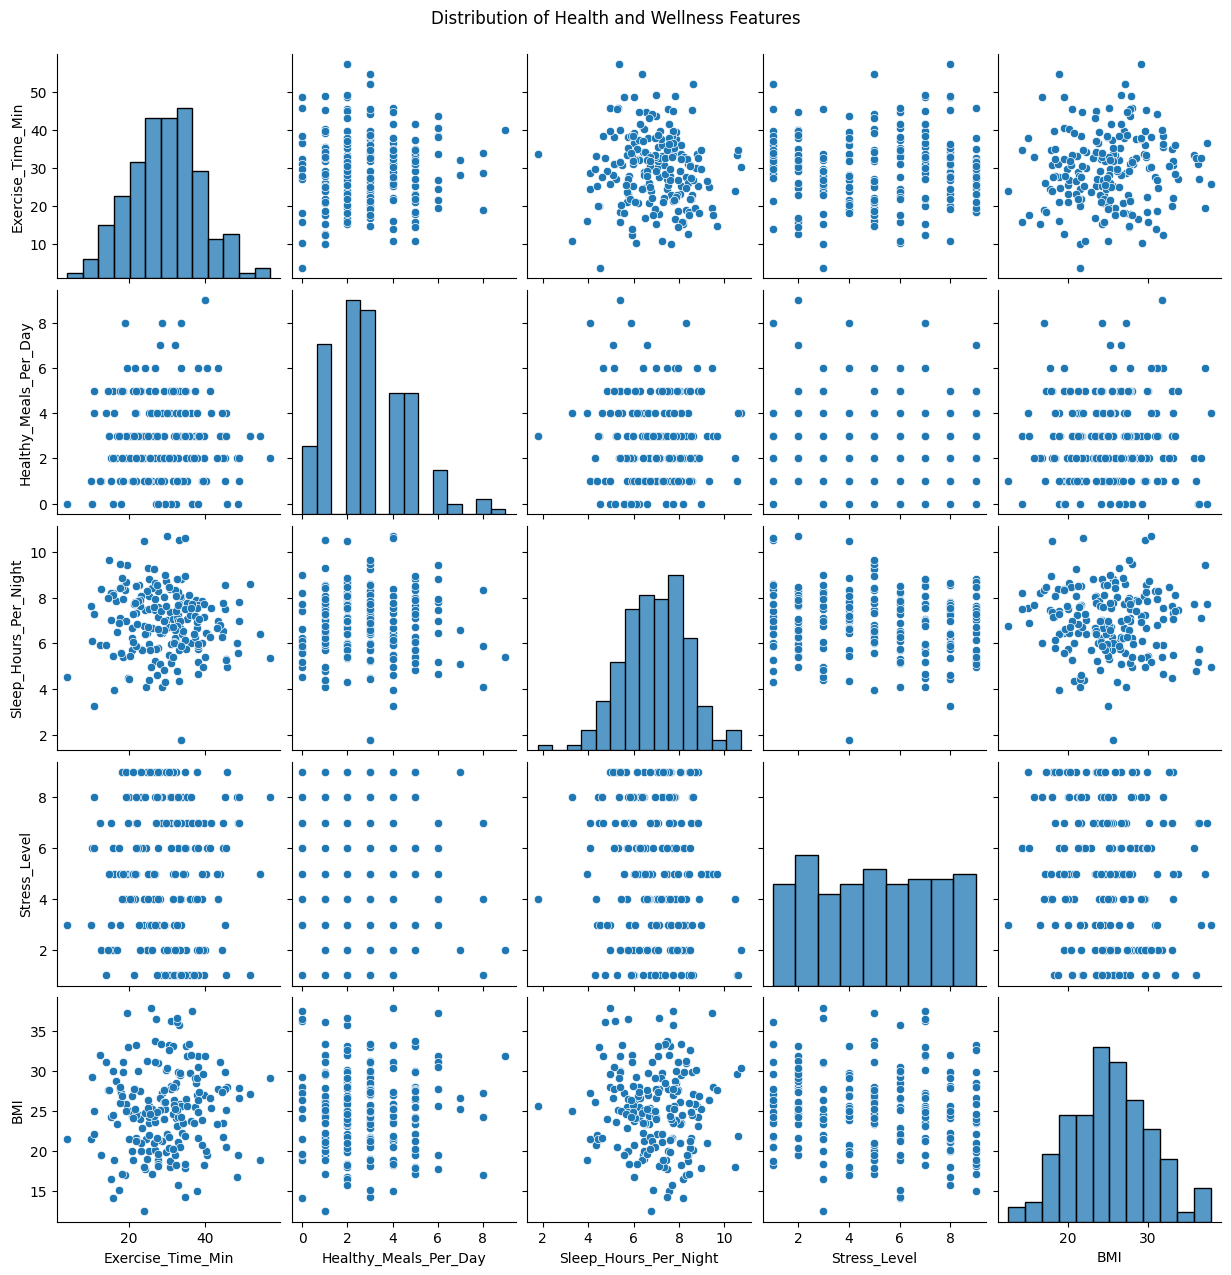

In [2]:
# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Summary statistics
print(data_numeric.describe())

# Distribution plots
plt.figure(figsize=(12, 10))
sns.pairplot(data_numeric)
plt.suptitle('Distribution of Health and Wellness Features', y=1.02)
plt.show()

# Scatter matrix using Plotly
fig = px.scatter_matrix(data, dimensions=numeric_cols, title='Scatter Matrix of Wellness Data')
fig.show()


K-Means Clustering (Before PCA)

Silhouette Score (Before PCA): 0.1516159911787657


<Figure size 1200x1000 with 0 Axes>

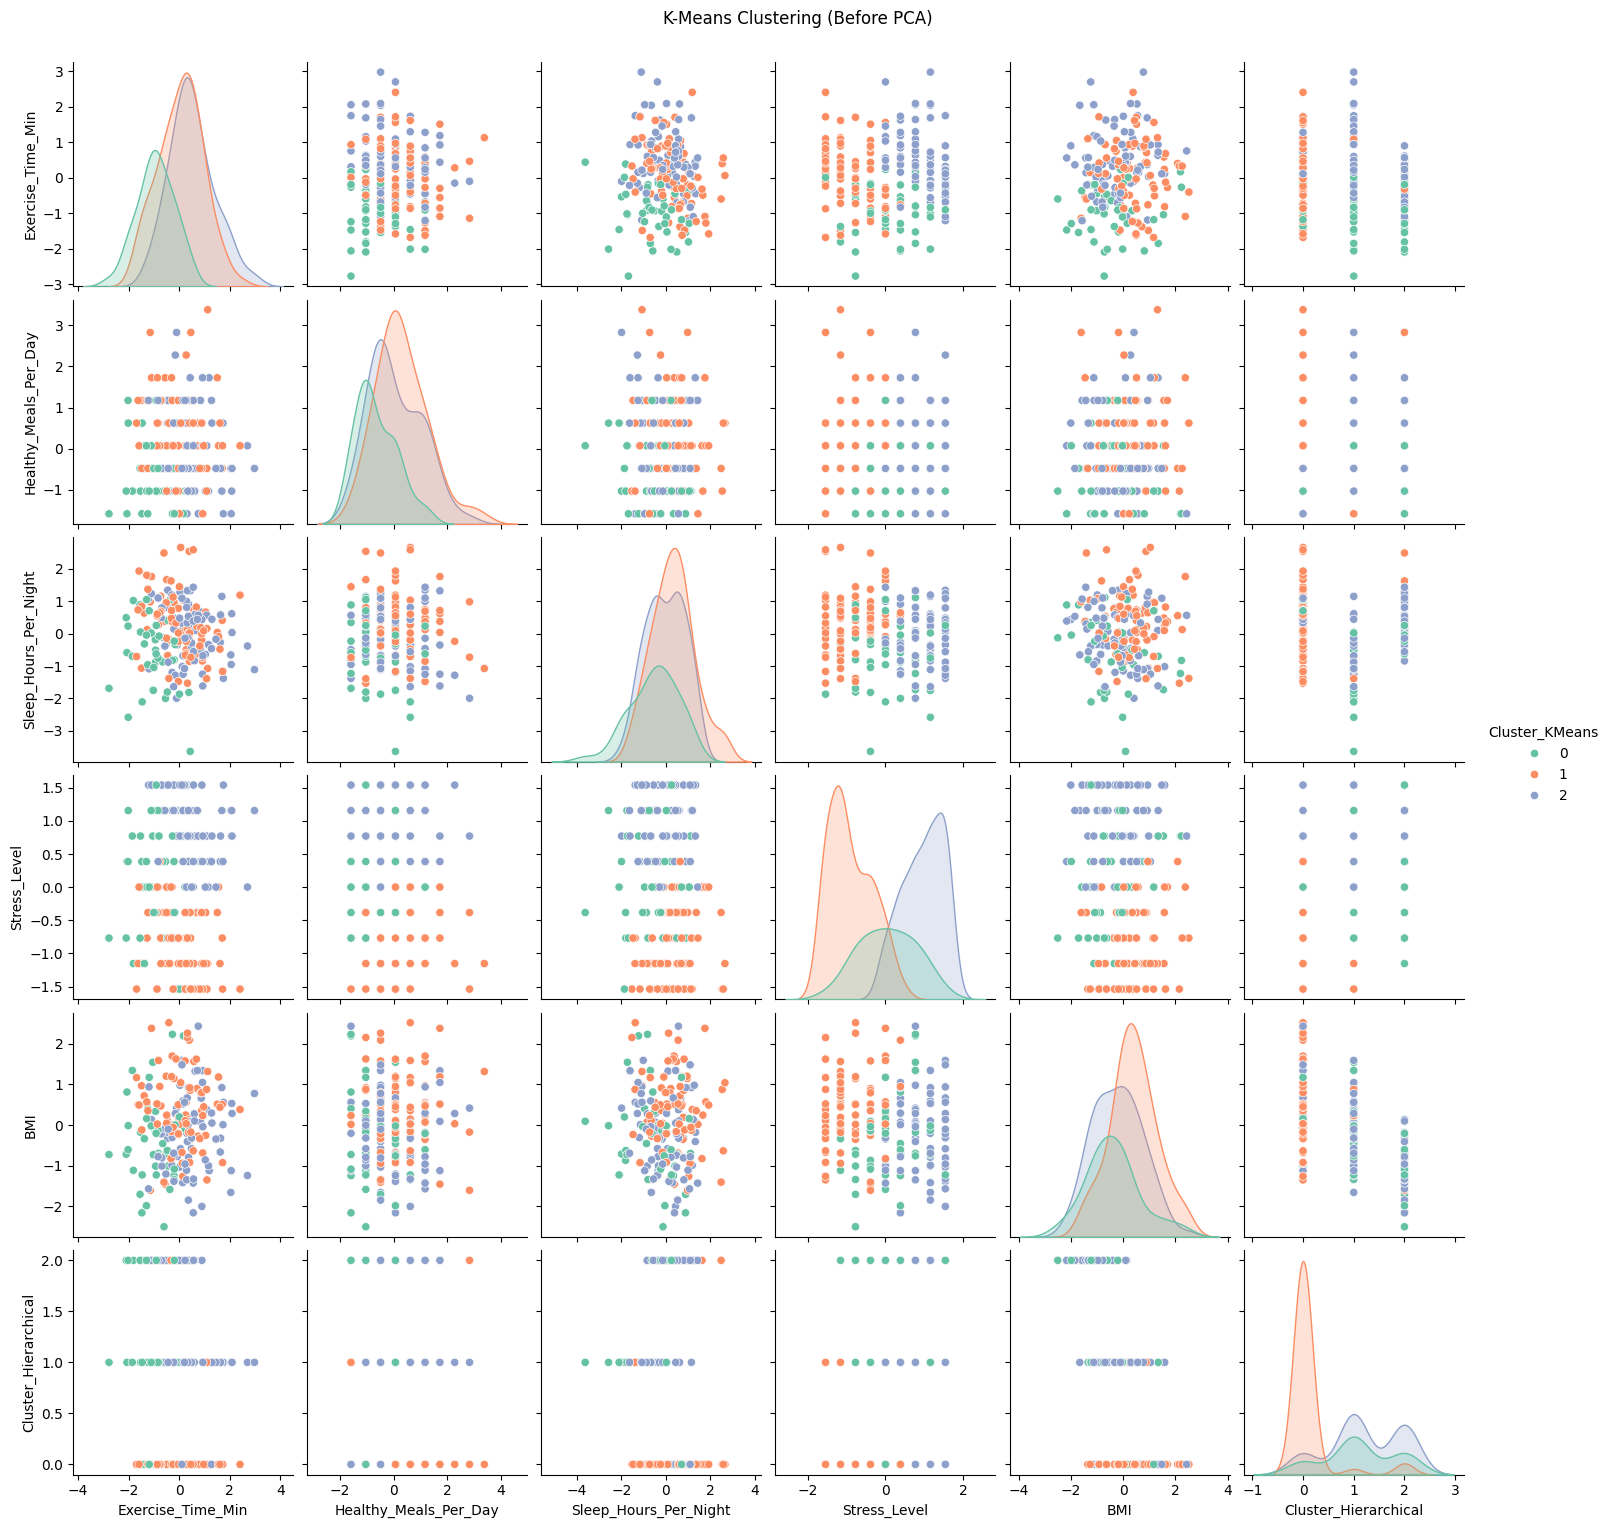

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
clusters_kmeans = kmeans.fit_predict(scaled_data)

# Add cluster labels to the DataFrame
scaled_df['Cluster_KMeans'] = clusters_kmeans

# Silhouette score for K-Means clustering
sil_score_kmeans = silhouette_score(scaled_data, clusters_kmeans)
print(f'Silhouette Score (Before PCA): {sil_score_kmeans}')

# Plot K-Means Clustering results
plt.figure(figsize=(12, 10))
sns.pairplot(scaled_df, hue='Cluster_KMeans', palette='Set2')
plt.suptitle('K-Means Clustering (Before PCA)', y=1.02)
plt.show()


K-Means Clustering (After PCA)

Silhouette Score (After PCA): 0.3625606718282872


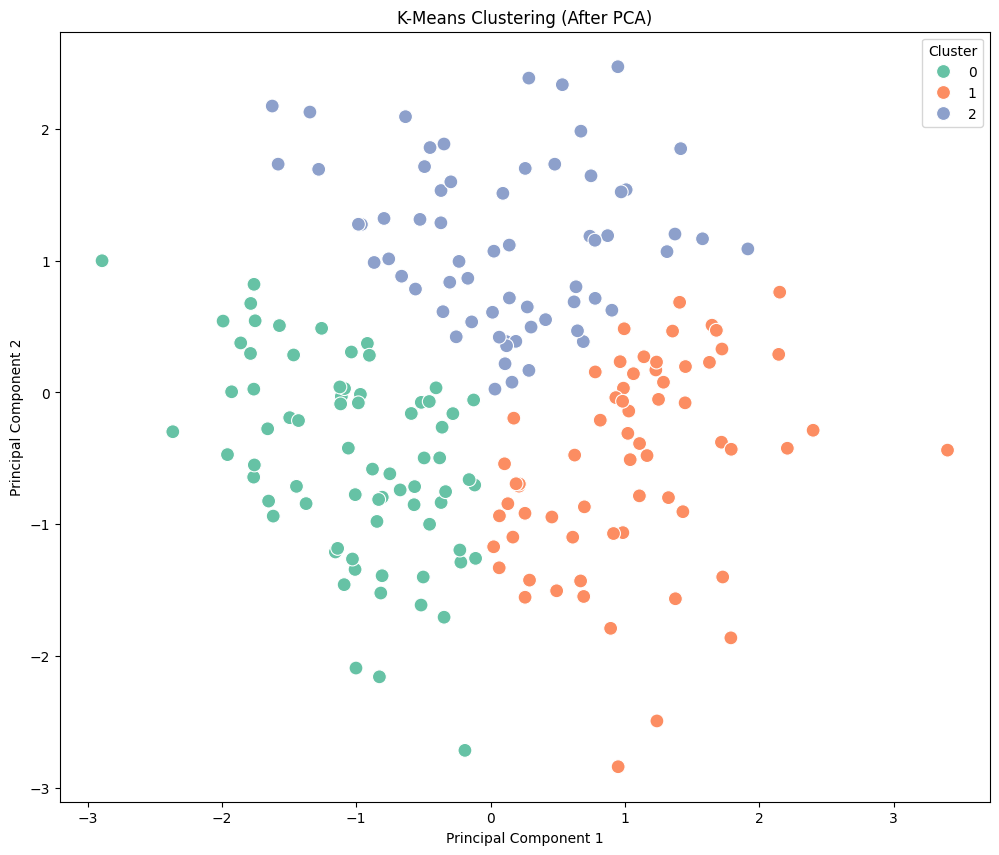

In [8]:
# Apply K-Means clustering on PCA-reduced data
kmeans_pca = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
clusters_kmeans_pca = kmeans_pca.fit_predict(pca_df[['PC1', 'PC2']])

# Add cluster labels to PCA DataFrame
pca_df['Cluster_KMeans'] = clusters_kmeans_pca

# Silhouette score for K-Means clustering on PCA-reduced data
sil_score_kmeans_pca = silhouette_score(pca_df[['PC1', 'PC2']], clusters_kmeans_pca)
print(f'Silhouette Score (After PCA): {sil_score_kmeans_pca}')

# Plot PCA components with K-Means Clustering
plt.figure(figsize=(12, 10))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster_KMeans', data=pca_df, palette='Set2', s=100)
plt.title('K-Means Clustering (After PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


Hierarchical Clustering (Before PCA)

Silhouette Score (Before PCA): 0.13628495765267165


<Figure size 1200x1000 with 0 Axes>

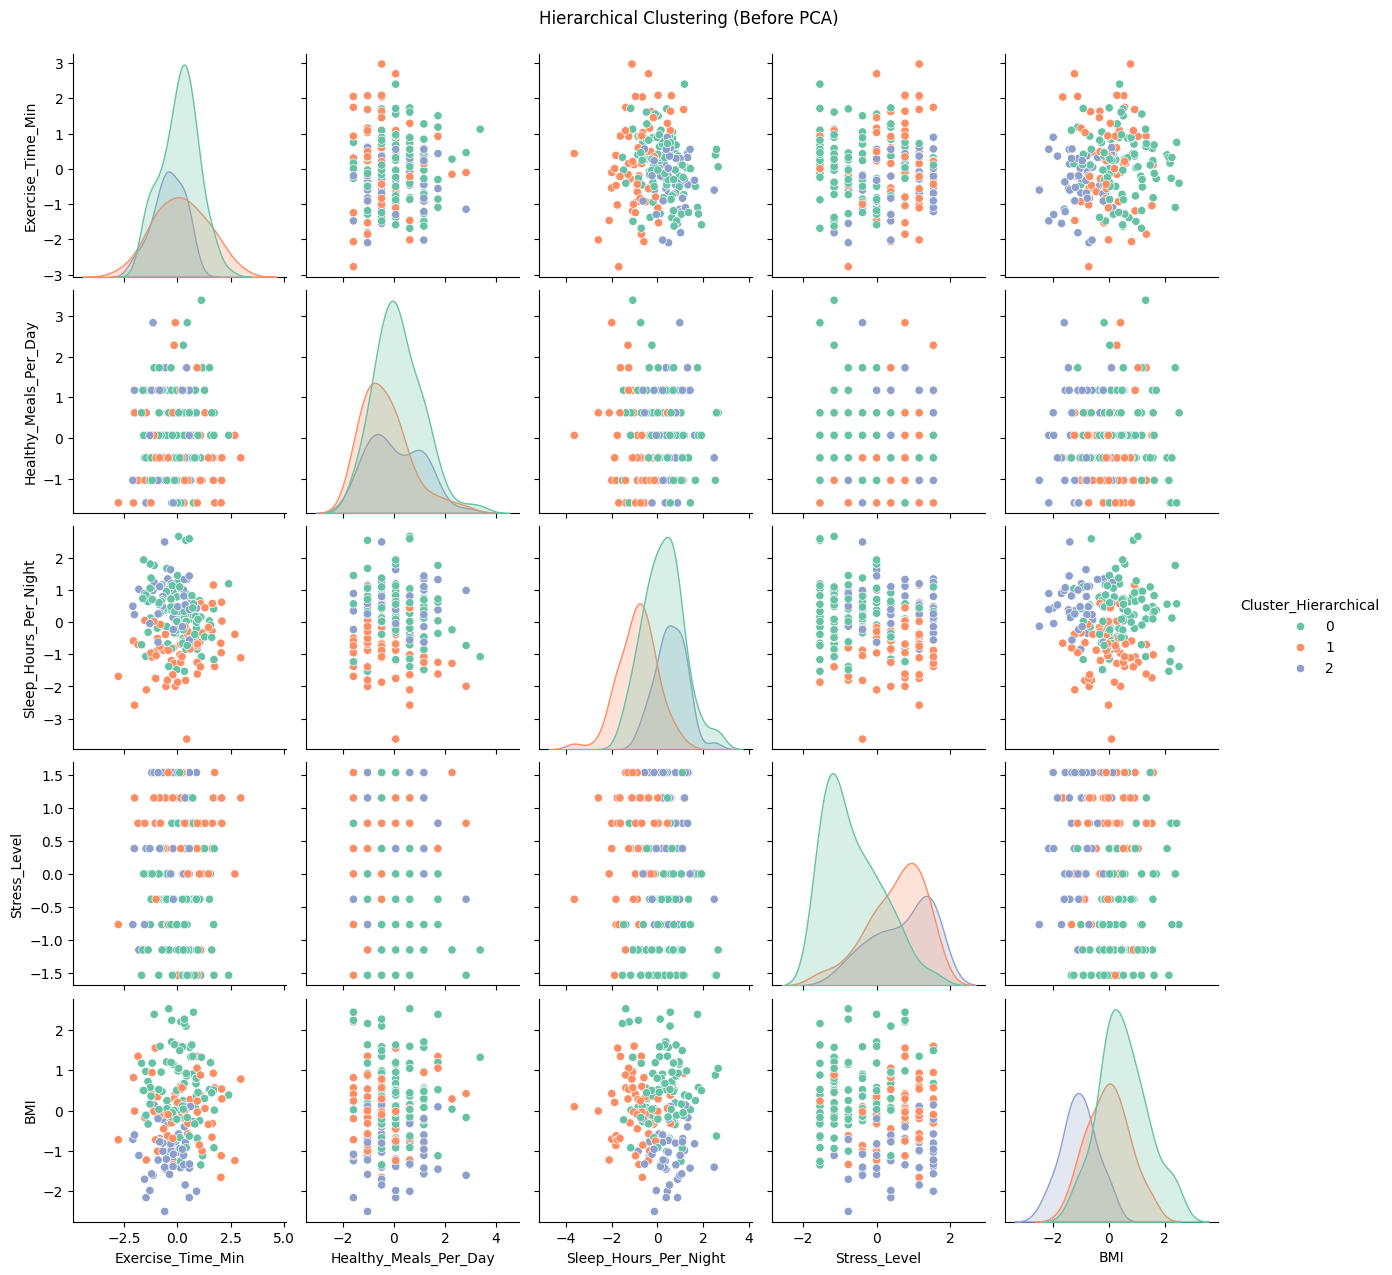

In [3]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
clusters_hierarchical = hierarchical.fit_predict(scaled_data)

# Add cluster labels to the DataFrame
scaled_df['Cluster_Hierarchical'] = clusters_hierarchical

# Silhouette score for Hierarchical Clustering
sil_score_hierarchical = silhouette_score(scaled_data, clusters_hierarchical)
print(f'Silhouette Score (Before PCA): {sil_score_hierarchical}')

# Plot Hierarchical Clustering results
plt.figure(figsize=(12, 10))
sns.pairplot(scaled_df, hue='Cluster_Hierarchical', palette='Set2')
plt.suptitle('Hierarchical Clustering (Before PCA)', y=1.02)
plt.show()


Dimensionality Reduction with PCA

In [4]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Convert PCA results to DataFrame
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster_Hierarchical'] = clusters_hierarchical

# PCA Loadings
pca_components = pca.components_
loadings_df = pd.DataFrame(pca_components.T, columns=['PC1', 'PC2'], index=numeric_cols)
print("PCA Loadings:")
print(loadings_df)


PCA Loadings:
                            PC1       PC2
Exercise_Time_Min      0.343398 -0.478061
Healthy_Meals_Per_Day  0.395626  0.060977
Sleep_Hours_Per_Night -0.220185  0.687225
Stress_Level          -0.530921 -0.543546
BMI                    0.628649  0.004418


Hierarchical Clustering (After PCA)

Silhouette Score (After PCA): 0.33440287604087543


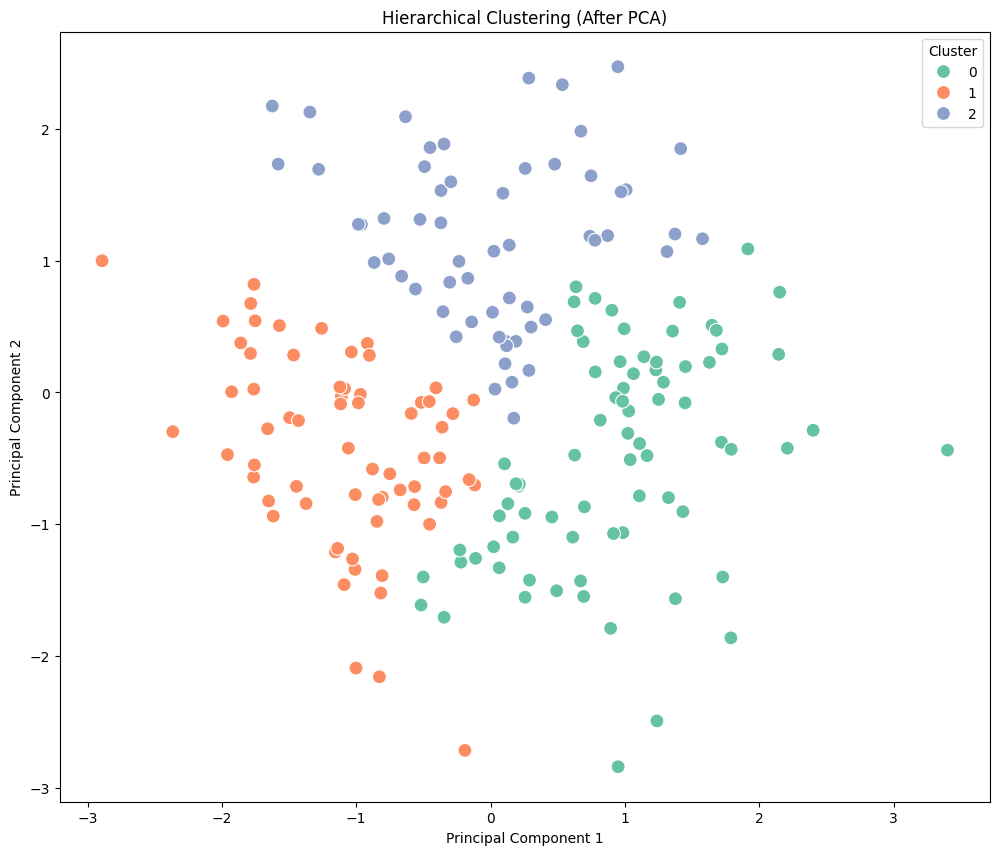

In [5]:
# Hierarchical Clustering on PCA-reduced data
hierarchical_pca = AgglomerativeClustering(n_clusters=3)
clusters_hierarchical_pca = hierarchical_pca.fit_predict(pca_df[['PC1', 'PC2']])

# Add cluster labels to PCA DataFrame
pca_df['Cluster_Hierarchical'] = clusters_hierarchical_pca

# Silhouette score for Hierarchical Clustering on PCA-reduced data
sil_score_hierarchical_pca = silhouette_score(pca_df[['PC1', 'PC2']], clusters_hierarchical_pca)
print(f'Silhouette Score (After PCA): {sil_score_hierarchical_pca}')

# Plot PCA components with Hierarchical Clustering
plt.figure(figsize=(12, 10))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster_Hierarchical', data=pca_df, palette='Set2', s=100)
plt.title('Hierarchical Clustering (After PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


Summary and Interpretation

In [6]:
# Summary of findings
print("Summary of Hierarchical Clustering:")
print(f"Silhouette Score before PCA: {sil_score_hierarchical}")
print(f"Silhouette Score after PCA: {sil_score_hierarchical_pca}")

# Interpretation of PCA components
print("PCA Components Interpretation:")
print(loadings_df)


Summary of Hierarchical Clustering:
Silhouette Score before PCA: 0.13628495765267165
Silhouette Score after PCA: 0.33440287604087543
PCA Components Interpretation:
                            PC1       PC2
Exercise_Time_Min      0.343398 -0.478061
Healthy_Meals_Per_Day  0.395626  0.060977
Sleep_Hours_Per_Night -0.220185  0.687225
Stress_Level          -0.530921 -0.543546
BMI                    0.628649  0.004418
